In [21]:
%pylab inline
import numpy as np
from mpl_toolkits.mplot3d import axes3d, Axes3D
from scipy.interpolate import RectBivariateSpline as RS
import warnings
warnings.filterwarnings("ignore")
np.printoptions(precision=2)


w_grid_size = 40
n_grid_size = 20
aSize = 2
sSize = 2
eSize = 2
T_max = 70
T_min = 0
T_size = T_max - T_min + 1
shape = (w_grid_size, n_grid_size, eSize, sSize, aSize, T_size)

# wealth discretization 
w_lower = 3
w_upper = 2000
# 401k amount discretization
n_lower = 3
n_upper = 1000
power = 2

def powspace(start, stop, power, num):
    start = np.power(start, 1/float(power))
    stop = np.power(stop, 1/float(power))
    return np.power(np.linspace(start, stop, num=num), power)


xgrid = np.array([[w,n,e,s,A] for w in powspace(w_lower, w_upper, power, w_grid_size)
                            for n in powspace(n_lower, n_upper, power, n_grid_size)
                            for s in [0,1]
                            for e in [0,1]
                            for A in [0,1]]).reshape((w_grid_size, n_grid_size, 2,2,2,5))

ws = powspace(w_lower, w_upper, power, w_grid_size)
ns = powspace(n_lower, n_upper, power, n_grid_size)

Populating the interactive namespace from numpy and matplotlib


In [28]:
Vgrid = np.loadtxt("Vgrid.txt").reshape(shape)
cgrid = loadtxt("cgrid.txt").reshape(shape)
bgrid = loadtxt("bgrid.txt").reshape(shape)
kgrid = loadtxt("kgrid.txt").reshape(shape)

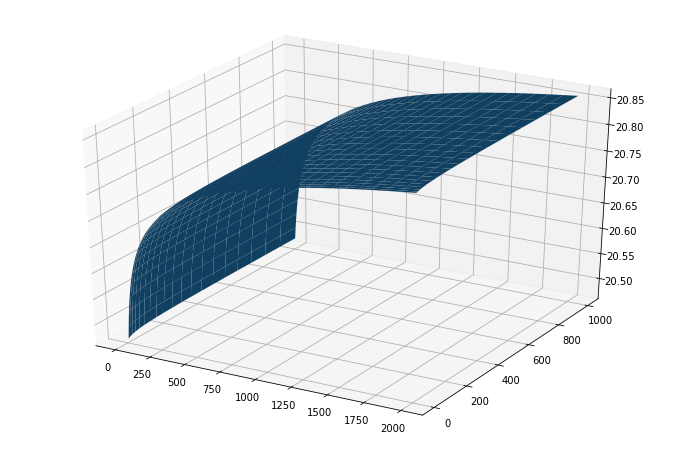

In [29]:
fig = plt.figure(figsize = [12, 8])
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X = xgrid[:,:,1,1,1,0], Y = xgrid[:,:,1,1,1,1], Z=Vgrid[:,:,1,1,1,0])
plt.show()

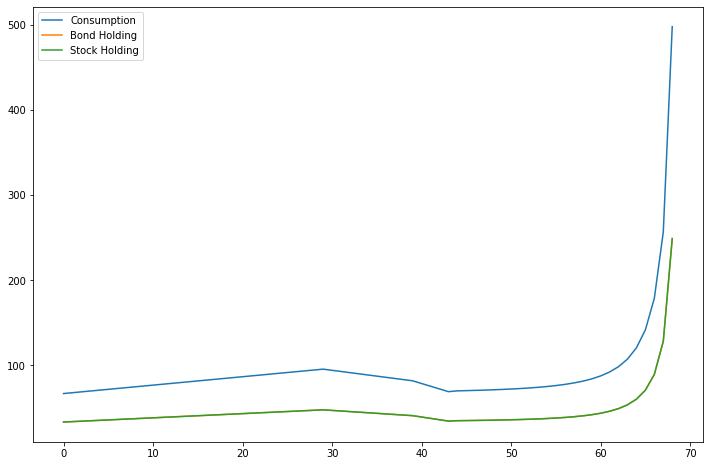

In [30]:
def summaryPlotChoiceVStime(w_level, n_level, s, e, A, C = cgrid, B = bgrid, K = kgrid):
    c = []
    b = []
    k = []
    for t in range(1,T_max):
        c.append(RS(ws, ns, C[:,:,s,e,A,t])(w_level, n_level)[0])
        b.append(RS(ws, ns, B[:,:,s,e,A,t])(w_level, n_level)[0])
        k.append(RS(ws, ns, K[:,:,s,e,A,t])(w_level, n_level)[0])
    plt.figure(figsize = [12,8])
    plt.plot(c, label = "Consumption")
    plt.plot(b, label= "Bond Holding")
    plt.plot(k, label="Stock Holding")
    plt.legend()
    plt.show()
summaryPlotChoiceVStime(100, 100, 1, 1, 1)